In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.style.use('dark_background')

In [2]:
data_file = './data/november2021anomalies.txt'
df = pd.read_csv(data_file, sep='\t', skiprows=1)
df

,"i j lon lat array(i,j)"
0,1 1 -179.00 -89.00 -0.1461
1,2 1 -177.00 -89.00 -0.1461
2,3 1 -175.00 -89.00 -0.1461
3,4 1 -173.00 -89.00 -0.1461
4,5 1 -171.00 -89.00 -0.1461
...,...
16195,176 90 171.00 89.00 9999.0000
16196,177 90 173.00 89.00 9999.0000
16197,178 90 175.00 89.00 9999.0000
16198,179 90 177.00 89.00 9999.0000


In [3]:
def separateint(element, index):
    return int(element.split()[index])

def separatefloat(element, index):
    return float(element.split()[index])

df['i'] = df[df.columns[0]].apply(separateint, index=0)
df['j'] = df[df.columns[0]].apply(separateint, index=1)
df['lon'] = df[df.columns[0]].apply(separatefloat, index=2)
df['lat'] = df[df.columns[0]].apply(separatefloat, index=3)
df['temp'] = df[df.columns[0]].apply(separatefloat, index=4)
df = df[['i', 'j', 'lon', 'lat', 'temp']]

df

,i,j,lon,lat,temp
0,1,1,-179.0,-89.0,-0.1461
1,2,1,-177.0,-89.0,-0.1461
2,3,1,-175.0,-89.0,-0.1461
3,4,1,-173.0,-89.0,-0.1461
4,5,1,-171.0,-89.0,-0.1461
...,...,...,...,...,...
16195,176,90,171.0,89.0,9999.0000
16196,177,90,173.0,89.0,9999.0000
16197,178,90,175.0,89.0,9999.0000
16198,179,90,177.0,89.0,9999.0000


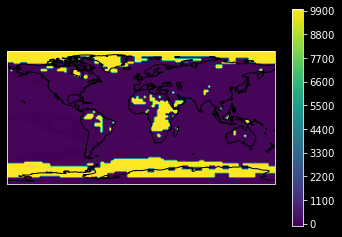

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.contourf(df['lon'].values.reshape((90,180)), 
             df['lat'].values.reshape((90,180)), 
             df['temp'].values.reshape((90,180)), 120,
             transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

In [5]:
def replacewrongtemps(element):
    if element > 20.0:
        return np.nan
    else:
        return element
    
df['temp_clean'] = df['temp'].apply(replacewrongtemps)

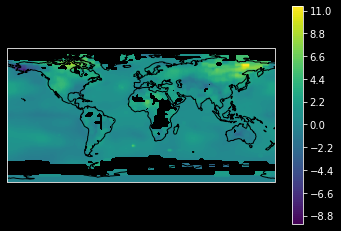

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(df['lon'].values.reshape((90,180)), 
             df['lat'].values.reshape((90,180)), 
             df['temp_clean'].values.reshape((90,180)), 120,
             transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

# EXTENT

In [7]:
min_lat, max_lat = 10,52
min_lon, max_lon = -123, -65

bfad_lon = 15
bfad_lat = 5

df_ca = df[df['lon'].between(min_lon-bfad_lon, max_lon+bfad_lon)]
df_ca = df_ca[df_ca['lat'].between(min_lat-bfad_lat, max_lat+bfad_lat)]

In [8]:
df_ca['lon'].value_counts().sort_index()

-137.0    27
-135.0    27
-133.0    27
-131.0    27
-129.0    27
-127.0    27
-125.0    27
-123.0    27
-121.0    27
-119.0    27
-117.0    27
-115.0    27
-113.0    27
-111.0    27
-109.0    27
-107.0    27
-105.0    27
-103.0    27
-101.0    27
-99.0     27
-97.0     27
-95.0     27
-93.0     27
-91.0     27
-89.0     27
-87.0     27
-85.0     27
-83.0     27
-81.0     27
-79.0     27
-77.0     27
-75.0     27
-73.0     27
-71.0     27
-69.0     27
-67.0     27
-65.0     27
-63.0     27
-61.0     27
-59.0     27
-57.0     27
-55.0     27
-53.0     27
-51.0     27
Name: lon, dtype: int64

In [9]:
type(len(df_ca['lon'].unique()))

int

In [10]:
df_ca['lat'].value_counts().sort_index()

5.0     44
7.0     44
9.0     44
11.0    44
13.0    44
15.0    44
17.0    44
19.0    44
21.0    44
23.0    44
25.0    44
27.0    44
29.0    44
31.0    44
33.0    44
35.0    44
37.0    44
39.0    44
41.0    44
43.0    44
45.0    44
47.0    44
49.0    44
51.0    44
53.0    44
55.0    44
57.0    44
Name: lat, dtype: int64

In [11]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 8481 to 13204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i           1188 non-null   int64  
 1   j           1188 non-null   int64  
 2   lon         1188 non-null   float64
 3   lat         1188 non-null   float64
 4   temp        1188 non-null   float64
 5   temp_clean  1178 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 65.0 KB


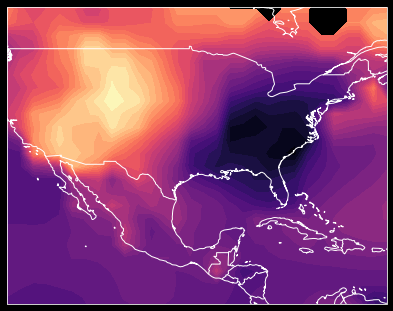

In [12]:
fig = plt.figure(figsize=[6.8, 8.5])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

# change the color of the axes' tick labels
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

# set the ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

ax.set_yticks([])
ax.set_yticklabels([])

# THE PLOT
ax.set_extent([min_lon, max_lon, min_lat, max_lat])

lat_len, lon_len = len(df_ca['lat'].unique()), len(df_ca['lon'].unique())

ax.add_feature(cfeature.BORDERS, edgecolor='white')
ax.add_feature(cfeature.COASTLINE, edgecolor='white')
pcm = plt.contourf(df_ca['lon'].values.reshape((lat_len,lon_len)), 
                   df_ca['lat'].values.reshape((lat_len,lon_len)), 
                   df_ca['temp_clean'].values.reshape((lat_len,lon_len)), 30,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.magma)

# # cbar_ticks = np.round(np.linspace(df_ca['temp_clean'].values.min(), df_ca['temp_clean'].values.max(),5),2)

# cb = fig.colorbar(pcm, ax=[ax], location='top', aspect=50, shrink=0.95, anchor=(0.0,-6.899))#,
# #                   ticks=cbar_ticks)
# cb.outline.set_linewidth(0.2)

# # ajustar
# plt.subplots_adjust(left=0.07, right=0.92, top=0.671)

# # titulo y subtitulo
# ax.text(-93.7, 24.1, s='Anomalías de temperatura \nen Centroamérica', size=29.1, weight='bold')
# subtitle = 'Comparadas con el resto del mundo, las anomalías de temperatura \ndel pasado mes de junio no fueron tan extremas en Centroamérica. \nSin embargo, hay lugares dentro de la región que están significati-\nvamente más calientes que hace cuatro décadas. \nDatos: data.giss.nasa.gov/gistemp/' 
# ax.text(-93.67, 20.1, s=subtitle, size=12.7)

# # unidades de temperatura
# ax.text(-76.707, 4.132, s='°C', size=11., color='grey')

# # autor
# ax.text(-95, 2, ' ' * 119 + 'Twitter: @DiegoGonH' + ' '*10,
#                 color='white',
#                 backgroundcolor='grey')

# plt.savefig('anomalias_temp_junio2021_centroamerica.jpg', dpi=128)


plt.show()

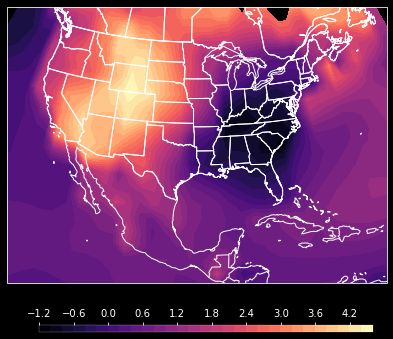

In [15]:
crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

fig = plt.figure(figsize=[6.8, 8.5])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(np.mean([min_lon, max_lon]), np.mean([min_lat, max_lat])))

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

# change the color of the axes' tick labels
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

# set the ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

ax.set_yticks([])
ax.set_yticklabels([])


ax.set_global()
# ax.gridlines()
# ax.set_extent([min_lon, max_lon, min_lat, max_lat])

# THE PLOT
ax.set_extent([min_lon, max_lon, min_lat, max_lat])

lat_len, lon_len = len(df_ca['lat'].unique()), len(df_ca['lon'].unique())

ax.add_feature(cfeature.BORDERS, edgecolor='white')
ax.add_feature(cfeature.COASTLINE, edgecolor='white')
ax.add_feature(cfeature.STATES, edgecolor='white')
pcm = plt.contourf(df_ca['lon'].values.reshape((lat_len,lon_len)), 
                   df_ca['lat'].values.reshape((lat_len,lon_len)), 
                   df_ca['temp_clean'].values.reshape((lat_len,lon_len)), 30,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.magma)


cbar_ticks = np.round(np.linspace(df_ca['temp_clean'].values.min(), df_ca['temp_clean'].values.max(),5),2)

cb = fig.colorbar(pcm, ax=[ax], location='top', aspect=50, shrink=0.88, anchor=(0.7,-5.56))#, ticks=cbar_ticks, color='white')
cb.outline.set_linewidth(0.2)

# plt.savefig('anomalias_temp_nov2021_norteamerica.jpg', dpi=128)

